<a href="https://colab.research.google.com/github/yuzhenke1122/supervised_ml_bank_churn/blob/main/Bank_Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Load Packages and Data

data source: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1Zw7tFqGjMw1vehzSenadec9oZrX0Q8jd/view?usp=sharing
id = "1Zw7tFqGjMw1vehzSenadec9oZrX0Q8jd"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

In [ ]:
bank_data = pd.read_csv('bank_churn.csv')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1. Exploratory Datat Analysis

## 1.1 Explore the Raw Data

There are 10,000 data points and 14 features in the raw data. 'Exited' is the response variable that we want to predict. There are 7963 observations for 'Exited' = 0, and 2037 observations for 'Exited' = 1.


**RowNumber**: the record number for each row;

**CustomerId**: the customer id for each row;

**Surname**: the surname of the customer;

**CreditScore**: the credit score of the customer;

**Geography**: the location of the customer;

**Gender**: the gender of the customer;

**Age**: the age of the customer;

**Tenure**: the number of years that the customer has been a client of the bank;

**Balance**: the balance in the bank for each customer;

**NumOfProducts**: the number of products that the customer has purchased through the bank;

**HasCrCard**: whether or not the customer has a credit card (0 = No, 1 = Yes);


**IsActiveMember**: whether or not the customer is an active member (0 = No, 1 = Yes);

**EstimatedSalary**: the estimated salary of the customer;

**Exited**: whether or not the customer left the bank (0 = No, 1 = Yes);

In [ ]:
# Check the number of rows and columns of data
bank_data.shape

(10000, 14)

In [ ]:
# Check first 10 rows of data
bank_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# Check data information
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
class_0 = bank_data[bank_data['Exited'] == 0]
print(class_0.shape)

class_1 = bank_data[bank_data['Exited'] == 1]
print(class_1.shape)

(7963, 14)
(2037, 14)


In [ ]:
# Obtain the response variable
y = bank_data['Exited']

## 1.2 Data Exploration

In [ ]:
# Check any missing values in each column
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check the number of unique value for each column
bank_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### 1.2.1 Numerical Features

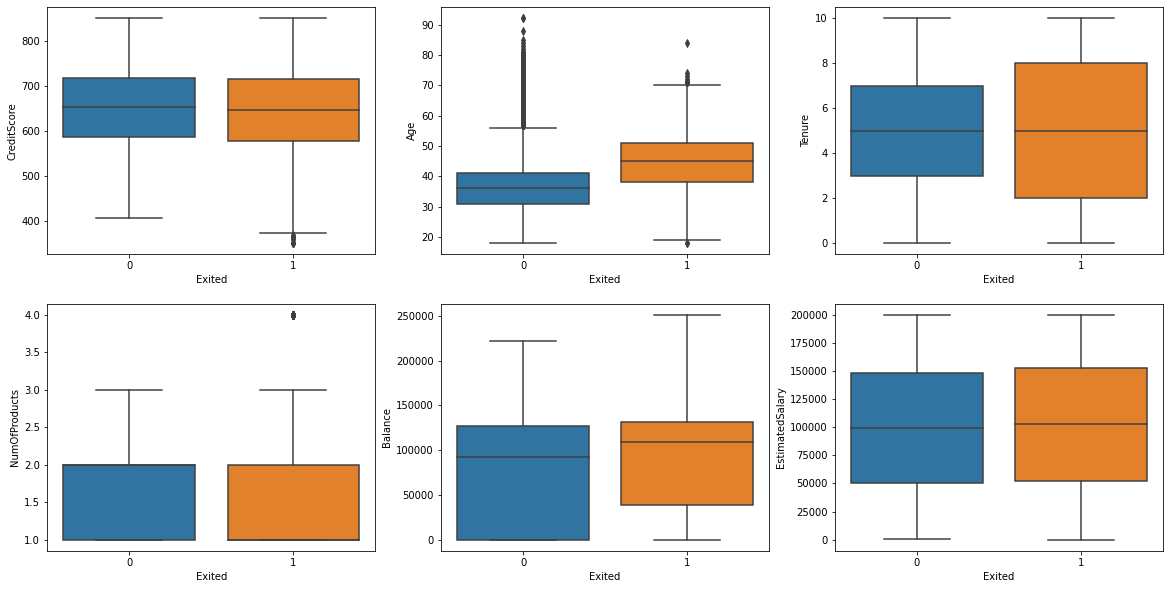

In [ ]:
# Boxplot for numerical features
_, axss = plt.subplots(2, 3, figsize = [20,10])
sns.boxplot(x = 'Exited', y = 'CreditScore', data = bank_data, ax = axss[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = bank_data, ax = axss[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = bank_data, ax = axss[0][2])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = bank_data, ax = axss[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data = bank_data, ax = axss[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = bank_data, ax = axss[1][2])

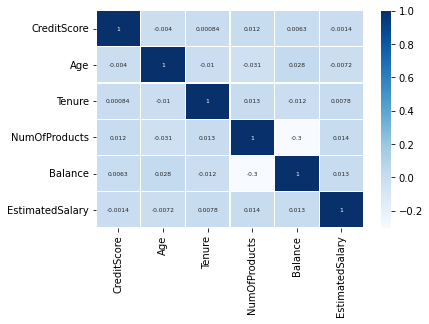

In [ ]:
# Check Correlations
corr_data = bank_data[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']]

sns.heatmap(corr_data.corr(), cmap = 'Blues', annot = True, annot_kws = {'size': 6}, linewidths = 0.3)

# It seems that there is no significant correlation between numerical variables.
# Don't have to worry about multicollinearity.

### 1.2.2 Categorical Features

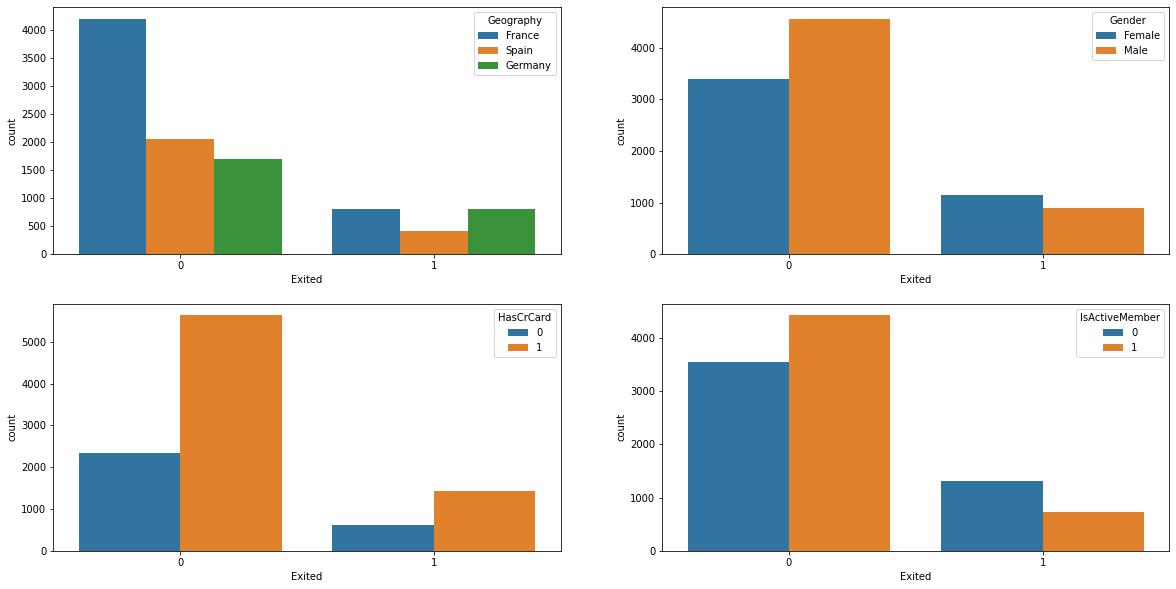

In [ ]:
# Barplot for categorical features
_, axss = plt.subplots(2, 2, figsize=[20,10])
sns.countplot(x = 'Exited', hue = 'Geography', data = bank_data, ax = axss[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = bank_data, ax = axss[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = bank_data, ax = axss[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = bank_data, ax = axss[1][1])

# Part 2: Data Preprocessing

In [ ]:
# Drop irrelavant features
X = bank_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

In [ ]:
print(X.shape)
print(X.dtypes)

(10000, 10)
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
num_ft = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
cat_ft = X.columns[X.dtypes == 'object']

In [ ]:
print(num_ft)
print(cat_ft)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Geography', 'Gender'], dtype='object')


# Part 3. Data Spliting

Use stratified sampling in this case.

Stratified Sampling:
Total Data: 100 --> 75 y = 1; 25 y = 0

Training Data: 80 --> 60 y = 1; 20 y = 0

Test Data: 20 --> 15 y = 1; 5 y = 0

In this dataset, we have total data points of 10,000. And about 8,000 are in 'Exited' = 0 class, and about 2,000 are in 'Exited' = 1 class.

We are going to reserve 25% of the data for testing.

In [ ]:
# Stratified Sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1)

print('The training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features.')
print('The test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features.')

The training data has 7500 observation with 10 features.
The test data has 2500 observation with 10 features.


In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


# Part 4. Data Transformation

## 4.1 One-hot Encoding for 'Geography'

In [ ]:
# Alternative: get_dummies
def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0
5,681,Female,43,8,154100.30,1,0,0,114659.81,1.0,0.0,0.0
6,685,Male,57,7,101868.51,1,0,1,113483.96,0.0,1.0,0.0
7,670,Male,33,1,0.00,2,1,1,86413.11,1.0,0.0,0.0
8,672,Male,68,0,126061.51,2,1,1,184936.77,0.0,1.0,0.0
9,794,Female,54,1,75900.84,1,1,1,192154.66,0.0,1.0,0.0


## 4.2 Ordinal Encoding for 'Gender'

In [ ]:
# Ordinal encoding for Gender
# Male = 1, Female = 0
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
X_train.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0
5,681,0.0,43,8,154100.30,1,0,0,114659.81,1.0,0.0,0.0
6,685,1.0,57,7,101868.51,1,0,1,113483.96,0.0,1.0,0.0
7,670,1.0,33,1,0.00,2,1,1,86413.11,1.0,0.0,0.0
8,672,1.0,68,0,126061.51,2,1,1,184936.77,0.0,1.0,0.0
9,794,0.0,54,1,75900.84,1,1,1,192154.66,0.0,1.0,0.0


## 4.3 Data Scaling (Standardization)

Use standardization to scale the numerical features in both training and test data.

Two different Scalers:

StardarScaler = standardization (x - mean)/std -> mu = 0, var = 1

MinMaxScaler = normalization (x - x_min)/(x_max - x_min) --> range: [0,1]

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train[num_ft])
X_train[num_ft] = scaler.transform(X_train[num_ft])
X_test[num_ft] = scaler.transform(X_test[num_ft])

In [ ]:
X_train.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0
5,0.323266,0.0,0.383861,1.040414,1.244552,-0.912769,-1.542199,-1.032529,0.263835,1.0,0.0,0.0
6,0.364620,1.0,1.709087,0.695022,0.409568,-0.912769,-1.542199,0.968496,0.243292,0.0,1.0,0.0
7,0.209542,1.0,-0.562729,-1.377333,-1.218916,0.796109,0.648425,0.968496,-0.229661,1.0,0.0,0.0
8,0.230219,1.0,2.750336,-1.722725,0.796320,0.796109,0.648425,0.968496,1.491640,0.0,1.0,0.0
9,1.491523,0.0,1.425110,-1.377333,-0.005555,-0.912769,0.648425,0.968496,1.617743,0.0,1.0,0.0


# Part 5. Model Training

In [ ]:
# Logistic Regression
classifier_logistic = LogisticRegression()

# Random Forest
classifier_RF = RandomForestClassifier()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()


In [ ]:
# This function prints out grid search results 
# In this case, best score is the accuracy
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))


## 5.1 Logistic Regression

In [ ]:
# Model training 
classifier_logistic.fit(X_train, y_train)
# Prediction of test data
classifier_logistic.predict(X_test)
# Accuracy score of test data
classifier_logistic.score(X_test, y_test)

0.8088

Penalty: L1: Lasso; L2: Ridge

C = 1/lambda value (weight)

C is the inverse of regularization strength; smaller values specify stronger regularization.


In [ ]:
parameters = {
    'C':(0.01, 0.05, 0.1, 0.2, 1),
    'penalty':('l1','l2')
} 

In [ ]:
Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv = 5)
# solver: the algorithm to find the weights that minimize the cost function
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [ ]:
# Print out the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

# C = 1, can adjust C within [0.9, 1.1] for precision

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [ ]:
best_LR_model = Grid_LR.best_estimator_

In [ ]:
# Prediction of test data
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of test data
best_LR_model.score(X_test, y_test)

0.8092

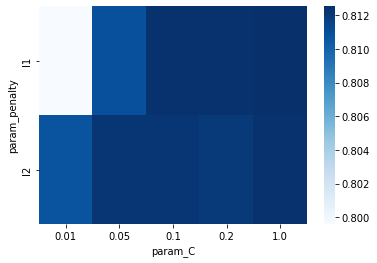

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values = 'mean_test_score'))
_ = sns.heatmap(res, cmap = 'Blues')

## 5.2 Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60, 80, 100],
    'max_depth': [1, 5, 10]
}
# n_estimators: the number of tree in random forest，
# max_depth: the maximum deapth of the tree

In [ ]:
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# Best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8645333333333334
Best parameters set:
max_depth:10
n_estimators:100


In [ ]:
# Best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(max_depth=10)

## 5.3 K Nearest Neighbors

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 10, 11, 12]
}
# n_neighbors: number of neighbors

In [ ]:
Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 10, 11, 12]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)
# can further check whether n_neighbors is 10, 11, 12 ... is better

Best score: 0.8445333333333332
Best parameters set:
n_neighbors:11


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

# Part 6. Model Evaluation

## 6.1 Evaluation on Confusion Matrix (Precision, Recall, Accuracy)

In [ ]:
def cal_evaluation(classifier, cm):
    """
    Function calculates accuracy, precision and recall scores.
    """
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0) # 0.0 
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy: " + str(accuracy))
    print ("Precision: " + str(precision))
    print ("Recall: " + str(recall))
    print ()

def draw_confusion_matrices(confusion_matricies):
    """
    Function prints out confusion matrices.
    """
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall 
#    for random forest, KNN and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("K Nearest Neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)
# Basically, random forest model is better than logistic regression model，
# because random forest is a more complicated model，
# if given a large data set, random forest model performs better than logistic regression model.

Random Forest
Accuracy: 0.858
Precision: 0.7916666666666666
Recall: 0.4106090373280943

K Nearest Neighbor
Accuracy: 0.8424
Precision: 0.7446808510638298
Recall: 0.343811394891945

Logistic Regression
Accuracy: 0.8092
Precision: 0.5963855421686747
Recall: 0.1944990176817289



## 6.2 Evaluation on ROC and AUC

### 6.2.1 Random Forest 

In [ ]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# fpr: false positive rate; tpr: true positive rate

In [ ]:
best_RF_model.predict_proba(X_test)

# first column: probability of non-churn: 0.74997138 label = 0
# second column: probability of churn: 0.25002862 label = 1

array([[0.74997138, 0.25002862],
       [0.93288696, 0.06711304],
       [0.76421709, 0.23578291],
       ...,
       [0.84834464, 0.15165536],
       [0.93312087, 0.06687913],
       [0.89031538, 0.10968462]])

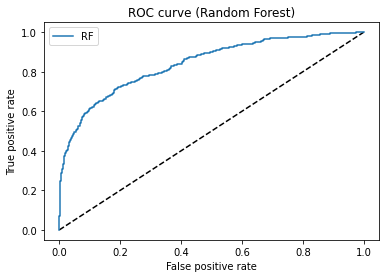

In [ ]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (Random Forest)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_rf, tpr_rf)

0.8409779173273839

### 6.2.2 K Nearest Neighbors

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_KNN = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_KNN, tpr_KNN, thresh = roc_curve(y_test, y_pred_KNN)

In [ ]:
best_KNN_model.predict_proba(X_test)

array([[0.90909091, 0.09090909],
       [1.        , 0.        ],
       [0.81818182, 0.18181818],
       ...,
       [0.81818182, 0.18181818],
       [1.        , 0.        ],
       [1.        , 0.        ]])

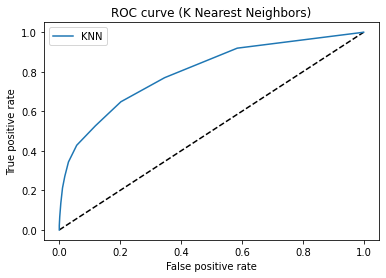

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label = 'KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (K Nearest Neighbors)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_KNN, tpr_KNN)

0.7979700400327998

### 6.2.3 Logistic Regression

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test)

array([[0.82436321, 0.17563679],
       [0.9317162 , 0.0682838 ],
       [0.85520556, 0.14479444],
       ...,
       [0.71449719, 0.28550281],
       [0.89278751, 0.10721249],
       [0.85560802, 0.14439198]])

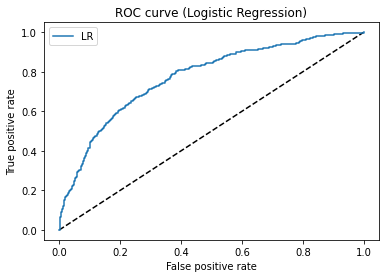

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (Logistic Regression)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr, tpr_lr)

0.7721998502100316

# Part 7. Feature Importance

In [ ]:
X_copy = X.copy()

X_copy = OneHotEncoding(X_copy, enc_ohe, ['Geography'])
X_copy['Gender'] = enc_oe.transform(X_copy[['Gender']])

X_copy.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# Add L1 regularization to Logistic Regression
# Check the coefficients

# L1 may have different coefficients for each run, it does not fix the coefficients for strongly correlated variables

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_copy)
LRmodel_l1 = LogisticRegression(penalty = "l1", C = 0.04, solver = 'liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_copy.shape[1]):
  print ("{0} : {1}".format(X_copy.columns[indices[ind]], round(LRmodel_l1.coef_[0][indices[ind]], 4)))



Logistic Regression (L1) Coefficients
Age : 0.7612
IsActiveMember : -0.5361
Geography_Germany : 0.3202
Gender : -0.2622
Balance : 0.164
CreditScore : -0.0638
NumOfProducts : -0.0584
Tenure : -0.0453
EstimatedSalary : 0.0269
HasCrCard : -0.0196
Geography_France : -0.0171
Geography_Spain : 0.0


In [ ]:
# Add L2 regularization to logistic regression
# Check the coefficients

# L2 has the only one optimized solution, because it fixes the coefficients for two strongly coreelated variables

np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_copy)
LRmodel_l2 = LogisticRegression(penalty = "l2", C = 0.1, solver = 'liblinear', random_state = 22)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_copy.shape[1]):
  print ("{0} : {1}".format(X_copy.columns[indices[ind]], round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
EstimatedSalary : 0.0272
HasCrCard : -0.0199


In [ ]:
# Check feature importance of random forest (feature selection)
forest = RandomForestClassifier()
forest.fit(X_copy, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_copy.shape[1]):
  print ("{0} : {1}".format(X_copy.columns[indices[ind]], round(importances[indices[ind]], 4)))


Feature importance ranking by Random Forest Model:
Age : 0.2409
EstimatedSalary : 0.1473
CreditScore : 0.1447
Balance : 0.1405
NumOfProducts : 0.1305
Tenure : 0.0815
IsActiveMember : 0.0407
Geography_Germany : 0.0198
Gender : 0.0181
HasCrCard : 0.0175
Geography_France : 0.0095
Geography_Spain : 0.0092


KNeighborsClassifier does not have the attribute 'feature_importances', therefore, we don't do the feature importance in KNN model.

# Part 8: Conclusion

'Age' is the most important feature. It is intuitive because when people get older, they tend to churn. The other potential important features are: 'IsActiveMember', 'EstimatedSalary', 'CreditScore', 'NumOfProducts' and 'Balance'.